# Step 1: Extract from OSM
The purpose of this script is to show how to go from a .osm.pbf file to a network format that GOSTnets will accept. 
Additional modifications in this script include: clipping the roads to an input polygon (here, rek2.shp), and filtering the roads DataFrame by a list of accepted road types, as tagged in OSM (see accepted_road_types list). 

In [1]:
import geopandas as gpd
import pandas as pd
import os, sys

In [2]:
# This is a Jupyter Notebook extension which reloads all of the modules whenever you run the code
# This is optional but good if you are modifying and testing source code
%load_ext autoreload
%autoreload 2

Add to your system path the location of the LoadOSM.py and GOSTnet.py scripts.  
In this case, we use relative paths ("..") to locate the parent directory (one level up). One dot (".") means current directory.

In [3]:
sys.path.append("../")
import GOSTnets as gn

The load_osm module is an optional GOSTNets submodule that is used to import OSM data. Make sure gdal, geopy, and boltons are installed first as it has additional dependencies (look in GOSTnets repo main README file if you need additional help with this). Then import the submodule.

In [4]:
from GOSTnets.load_osm import *

Define filepaths.

In [11]:
pth = "/home/mmastro/World_Bank/GOSTnets/Tutorials/" # change this path to your working folder
fil = r'iceland-latest.osm.pbf' # download this file from geofabrik: http://download.geofabrik.de/europe/iceland.html. 

# be sure to place the .osm.pbf file in the 'tutorial data' folder. 

f = os.path.join(pth, 'tutorial_data', fil)

In [12]:
f

'/home/mmastro/World_Bank/GOSTnets/Tutorials/tutorial_data/iceland-latest.osm.pbf'

GOSTNets creates a special 'OSM_to_network' object. This object gets initialized with both a copy of the OSM file itself and the roads extracted from the OSM file in a GeoPandas DataFrame. This DataFrame is a property of the object called 'roads_raw' and is the starting point for our network.

In [65]:
iceland_graph = ox.graph_from_place('Reykjavik', network_type='drive')
iceland_gdf = ox.graph_to_gdfs(iceland_graph)
iceland_gdf[1].columns

(                     y          x  street_count highway  \
 osmid                                                     
 13472322     64.105942 -21.777072             3     NaN   
 13472516     64.123571 -21.784768             3     NaN   
 13472744     64.111916 -21.780669             4     NaN   
 13489663     64.123781 -21.832491             3     NaN   
 13490026     64.124988 -21.849055             3     NaN   
 ...                ...        ...           ...     ...   
 11157711659  64.137625 -21.947643             3     NaN   
 11170348739  64.144906 -21.774797             3     NaN   
 11170348747  64.144730 -21.774704             3     NaN   
 11179618241  64.132876 -21.845526             3     NaN   
 11180943705  64.147036 -21.890253             3     NaN   
 
                                geometry  
 osmid                                    
 13472322     POINT (-21.77707 64.10594)  
 13472516     POINT (-21.78477 64.12357)  
 13472744     POINT (-21.78067 64.11192)  
 13

In [13]:
iceland = OSM_to_network(f)

skipping over reading other tags of osm_id: 5096419
skipping over reading other tags of osm_id: 5096423
skipping over reading other tags of osm_id: 5096426
skipping over reading other tags of osm_id: 7997603
skipping over reading other tags of osm_id: 16618981
skipping over reading other tags of osm_id: 25752609
skipping over reading other tags of osm_id: 38290957
skipping over reading other tags of osm_id: 48320149
skipping over reading other tags of osm_id: 48321029
skipping over reading other tags of osm_id: 48321051
skipping over reading other tags of osm_id: 48321052
skipping over reading other tags of osm_id: 48321062
skipping over reading other tags of osm_id: 48321063
skipping over reading other tags of osm_id: 48321123
skipping over reading other tags of osm_id: 48321136
skipping over reading other tags of osm_id: 48321139
skipping over reading other tags of osm_id: 48321445
skipping over reading other tags of osm_id: 80172077
skipping over reading other tags of osm_id: 117627

/home/mmastro/miniconda3/envs/geo_wb/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/mmastro/miniconda3/envs/geo_wb/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
?iceland

Type:           OSM_to_network
String form:    <GOSTnets.load_osm.OSM_to_network object at 0x7fdcd07a98e0>
File:           ~/World_Bank/GOSTnets/GOSTnets/load_osm.py
Docstring:     
Object to load OSM PBF to networkX objects.

Object to load OSM PBF to networkX objects.     EXAMPLE:     G_loader = losm.OSM_to_network(bufferedOSM_pbf)     G_loader.generateRoadsGDF()     G = G.initialReadIn() 
snap origins and destinations     o_snapped = gn.pandana_snap(G, origins)     d_snapped = gn.pandana_snap(G, destinations)     
Init docstring: Generate a networkX object from a osm file

In [108]:
iceland.roads_raw

,osm_id,infra_type,one_way,geometry
0,2818432,path,False,"LINESTRING (-16.87492 65.61337, -16.87472 65.6..."
1,2818434,path,False,"LINESTRING (-16.87107 65.59977, -16.86998 65.5..."
2,2818477,unclassified,False,"LINESTRING (-16.91740 65.61072, -16.91708 65.6..."
3,2837331,path,False,"LINESTRING (-16.51340 66.00186, -16.51331 66.0..."
4,2837332,service,False,"LINESTRING (-16.51283 66.00156, -16.51272 66.0..."
...,...,...,...,...
84389,688958534,service,False,"LINESTRING (-16.18002 64.04791, -16.18012 64.0..."
84390,688958535,service,False,"LINESTRING (-16.17835 64.04695, -16.17849 64.0..."
84391,688958536,path,False,"LINESTRING (-16.17835 64.04695, -16.17809 64.0..."
84392,688958537,path,False,"LINESTRING (-16.18039 64.04797, -16.18082 64.0..."


In [110]:
# show the different highway types and counts
iceland.roads_raw.infra_type.value_counts()

infra_type
service           25165
footway           15868
track              9953
residential        9519
path               7292
tertiary           4573
unclassified       2997
secondary          2898
primary            2353
trunk              1461
steps               793
trunk_link          283
platform            269
bridleway           247
primary_link        170
cycleway            124
secondary_link       95
living_street        89
tertiary_link        47
motorway             40
motorway_link        36
construction         34
pedestrian           24
proposed             16
road                 14
raceway              12
corridor              8
bus_stop              7
planned               2
rest_area             2
emergency_bay         1
abandoned             1
services              1
Name: count, dtype: int64

We define a list of the types of roads from the above that we consider acceptable for our road network

In [144]:
accepted_road_types = ['residential', 'unclassified', 'track','service','tertiary','road','secondary','primary','trunk','primary_link','trunk_link','tertiary_link','secondary_link']

We call the filterRoads method and pass it a list of acceptable road types

In [145]:
iceland.filterRoads(acceptedRoads = accepted_road_types)

In [146]:
iceland.roads_raw.infra_type.value_counts()

infra_type
service           25165
track              9953
residential        9519
tertiary           4573
unclassified       2997
secondary          2898
primary            2353
trunk              1461
trunk_link          283
primary_link        170
secondary_link       95
tertiary_link        47
road                 14
Name: count, dtype: int64

Here, we import a shapefile for our area of interest. We want to make a map of Reykjavik, Iceland. We clip the extent of the country file to just the area around the capital (rek2.shp) below using standard GeoPandas functions:

In [147]:
clip_shp = gpd.read_file(os.path.join(pth, 'tutorial_data', 'rek2.shp'))
clip_shp = clip_shp.to_crs({'init':'epsg:4326'})
clip_shp_obj = clip_shp.geometry.iloc[0]

/home/mmastro/miniconda3/envs/geo_wb/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

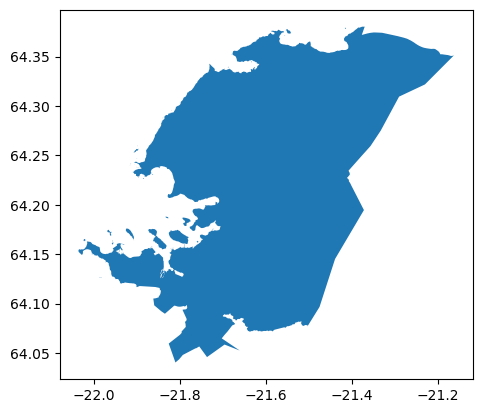

In [148]:
# this is a geopandas dataframe
clip_shp.plot()

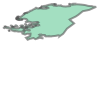

In [149]:
# this is the geometry object (shapely) from clip_shp
clip_shp_obj

We check to see everything lines up by running intersect and counting the True / False returns. The count of the True values are the number of roads that intersect the AOI

In [150]:
# intersects is a Shapely function that returns True if the boundary or interior of the object intersect in any way with those of the other
iceland.roads_raw.geometry.intersects(clip_shp_obj).value_counts()

False    48689
True     10839
Name: count, dtype: int64

Remove any roads that don't intersect the capital area, by modifying the roads_raw from the 'OSM_to_network' object 

In [152]:
iceland.roads_raw = iceland.roads_raw.loc[iceland.roads_raw.geometry.intersects(clip_shp_obj) == True]
iceland.roads_raw.infra_type.value_counts()


infra_type
service           4884
residential       2732
tertiary           988
secondary          688
track              428
primary            308
trunk              259
unclassified       227
trunk_link         153
primary_link        90
secondary_link      55
tertiary_link       26
road                 1
Name: count, dtype: int64

Having narrowed the DataFrame to the roads we are interested in, we generate the RoadsGPD object, which is stored as a property of the 'OSM_to_network' object. The RoadsGPD object is a GeoDataFrame that further processes the roads. This includes splitting the edges where intersections occur, adding unique edge IDs, and adding to/from columns to the GeoDataFrame.

In [169]:
iceland.generateRoadsGDF(verbose = False)

/home/mmastro/World_Bank/GOSTnets/GOSTnets/load_osm.py:292: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if "Point" == inter.type:
/home/mmastro/World_Bank/GOSTnets/GOSTnets/load_osm.py:292: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if "Point" == inter.type:
/home/mmastro/World_Bank/GOSTnets/GOSTnets/load_osm.py:292: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if "Point" == inter.type:
/home/mmastro/World_Bank/GOSTnets/GOSTnets/load_osm.py:292: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if "Point" == inter.type:
/home/mmastro/World_Bank/GOSTnets/GOSTnets/load_osm.py:292: ShapelyD

With the initialReadIn() function, we transform this to a graph object

In [174]:
G = iceland.initialReadIn()
print(nx.info(G))

MultiDiGraph with 16115 nodes and 19462 edges


/tmp/ipykernel_2462/1698687320.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


Try compare the Reykjavik 'OSM_to_network' object with the gpd retrieved from OSMNX

In [168]:
import osmnx as ox

# # Import MultiGraph object
 
# G = ox.graph_from_place('Reykjavik', network_type='drive')
# ox.plot_graph(G)

# Load generic GDF based on location
# c
# rek = ox.geocode_to_gdf(place_name)
# rek

place_name = "Reykjavik"
tags = {'highway': True}
rek_roads = ox.features_from_address(place_name, tags)

# Filter the GeoPandas DataFrame based on the condition
filtered_roads = rek_roads[rek_roads['highway'].notnull()]
filtered_roads["osm_id"] = filtered_roads.index.droplevel(level=['element_type'])
filtered_roads.index = filtered_roads.index.droplevel(level=['element_type'])

filtered_roads = filtered_roads[['osm_id', 'highway', 'geometry']]
filtered_roads = filtered_roads.loc[filtered_roads.highway.isin(accepted_road_types)]
filtered_roads.highway.value_counts()



highway
service           477
residential       272
primary            84
tertiary           80
secondary          69
unclassified       20
primary_link        7
tertiary_link       2
track               1
secondary_link      1
Name: count, dtype: int64

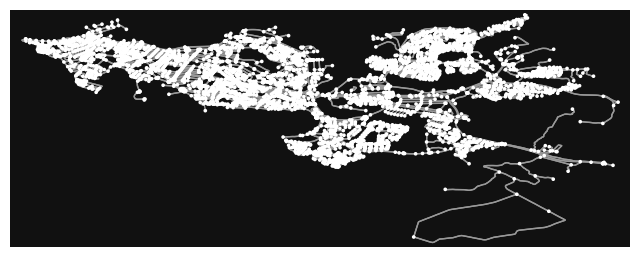

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [159]:
# plotting functions only work if the graphs have a name and a crs attribute
G = ox.graph_from_place('Reykjavik', network_type='drive')
G.graph['crs'] = 'epsg:32646'
G.graph['name'] = 'Iceland'

# original graph
ox.plot_graph(G, edge_linewidth=1, node_size=7)

In [171]:
# plotting functions only work if the graphs have a name and a crs attribute
iceland.graph['crs'] = 'epsg:32646'
iceland.graph['name'] = 'Iceland'

# original graph
ox.plot_graph(iceland, edge_linewidth=1, node_size=7)

AttributeError: 'OSM_to_network' object has no attribute 'graph'